# Observations and Insights 

### Infubinol study got an outlier.
### There was virtualy the same amount of m/f  mice in this study
### Bigger mice got bigger tumors with 0.85 correlation coefficient
### At least some random mice in Capomulin study show decrese in tumor size
### 

In [233]:
# Dependencies and Setup
import random
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
group_byname = merge_df.groupby('Mouse ID')
len(group_byname['Mouse ID'])

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df[merge_df.duplicated(['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
# See Above

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']

In [6]:
#Checking the number of mice in the clean DataFrame.
group_byname = clean_df.groupby('Mouse ID')
len(group_byname['Mouse ID'])

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
reg_summary = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}).reset_index()

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
reg_summary

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

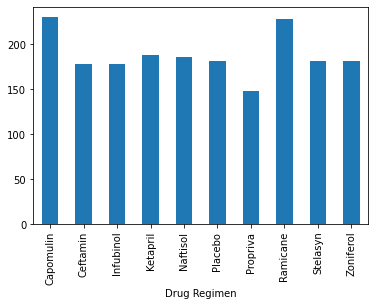

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mesurement_count = clean_df.groupby('Drug Regimen').count()
mesurement_count['Timepoint'].plot(kind='bar')

<BarContainer object of 10 artists>

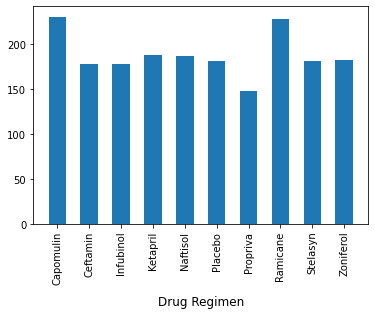

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot. 
# AND get to look identical.
mesurement_count = clean_df.groupby('Drug Regimen').count().reset_index()
plt.xticks(rotation='vertical')
plt.title('Drug Regimen', y = -0.4)
plt.bar(x = mesurement_count['Drug Regimen'], height = mesurement_count['Timepoint'],width=0.55)

<AxesSubplot:ylabel='Timepoint'>

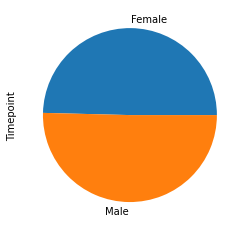

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
tmp_df = clean_df.groupby('Mouse ID').max()
gender_count = tmp_df.groupby('Sex').count()
gender_count['Timepoint'].plot(kind='pie')

([<matplotlib.patches.Wedge at 0x297c84e0bb0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

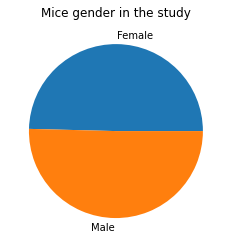

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Mice gender in the study')
plt.pie(gender_count['Timepoint'], labels=['Female','Male'])

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_time = clean_df.sort_values('Timepoint')
last_time = last_time.drop_duplicates(subset=['Mouse ID'], keep='last').reset_index()
lt_leaders = last_time[last_time['Drug Regimen'] == 'Capomulin']
lt_leaders = lt_leaders.append(last_time[last_time['Drug Regimen'] == 'Ramicane'])
lt_leaders = lt_leaders.append(last_time[last_time['Drug Regimen'] == 'Infubinol'])
lt_leaders = lt_leaders.append(last_time[last_time['Drug Regimen'] == 'Ceftamin']).reset_index()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# I guess I would have to do that if I used groupby to get here?
lt_leaders

,level_0,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,42,340,w150,Capomulin,Male,23,23,10,39.952347,0
1,47,1455,r157,Capomulin,Male,22,25,15,46.539206,0
2,55,64,f966,Capomulin,Male,16,17,20,30.485985,0
3,101,317,j246,Capomulin,Female,21,21,35,38.753265,1
4,127,124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...,...,...
95,219,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
96,220,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
97,224,1773,x581,Ceftamin,Female,19,28,45,64.634949,3
98,231,1260,o287,Ceftamin,Male,2,28,45,59.741901,4


In [130]:
# Put treatments into a list for for loop (and later for plot labels)
lead_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
t_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lt_leaders['Tumor Volume (mm3)'].describe()
q1 = np.percentile(lt_leaders['Tumor Volume (mm3)'], 25)  
q2 = np.percentile(lt_leaders['Tumor Volume (mm3)'], 50)  
q3 = np.percentile(lt_leaders['Tumor Volume (mm3)'], 75)  
iqr = st.iqr(lt_leaders['Tumor Volume (mm3)'])
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for i in range(len(lt_leaders)) : 
    if lt_leaders.loc[i,'Tumor Volume (mm3)'] > (iqr * 1.5 + q3):
        print(lt_leaders.loc[i,'Mouse ID']) 
    if lt_leaders.loc[i,'Tumor Volume (mm3)'] < (q1 - (iqr * 1.5)):
        print(lt_leaders.loc[i,'Mouse ID']) 
#It appears that the ENTIRE SET for 4 leading drugs doesnt have outliers, 
#most likely they will show up if data looked at separatly for each drug.

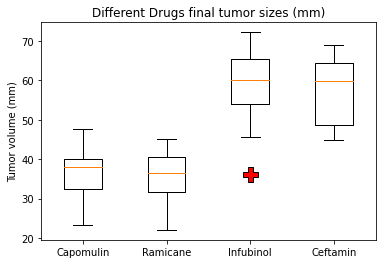

In [255]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df1 = lt_leaders[lt_leaders['Drug Regimen'] == 'Capomulin']
df2 = lt_leaders[lt_leaders['Drug Regimen'] == 'Ramicane']
df3 = lt_leaders[lt_leaders['Drug Regimen'] == 'Infubinol']
df4 = lt_leaders[lt_leaders['Drug Regimen'] == 'Ceftamin']
data = [df1['Tumor Volume (mm3)'],df2['Tumor Volume (mm3)'],df3['Tumor Volume (mm3)'],df4['Tumor Volume (mm3)']]
fig, ax = plt.subplots()
ax.set_title('Different Drugs final tumor sizes (mm)')
ax.boxplot(data, labels=lead_list, flierprops=dict(markerfacecolor='r', marker='P', markersize=15))
plt.ylabel('Tumor volume (mm)')
plt.show()

## Line and Scatter Plots

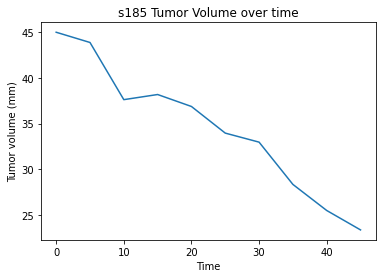

In [254]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tmp = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].reset_index()
#If we talk stats - we cant just pick it ourself...
i = random.randint(0, len(tmp))
luky_mouse = tmp.loc[i,'Mouse ID'] 
tmp = tmp[tmp['Mouse ID'] == luky_mouse] 
title = luky_mouse + " Tumor Volume over time"
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Tumor volume (mm)')
plt.plot(tmp['Timepoint'], tmp['Tumor Volume (mm3)'])

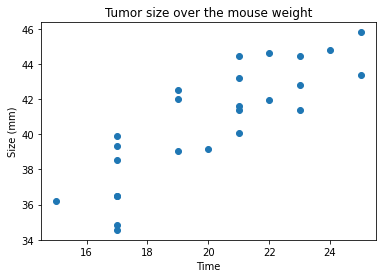

In [251]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tmp = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].reset_index()
tmp = tmp.groupby('Mouse ID').mean()
plt.title('Tumor size over the mouse weight')
plt.xlabel('Time')
plt.ylabel('Size (mm)')
plt.scatter(tmp['Weight (g)'], tmp['Tumor Volume (mm3)'])

## Correlation and Regression

(0.8419363424694717, 1.322572243471279e-07)
y = 0.95x + 21.55


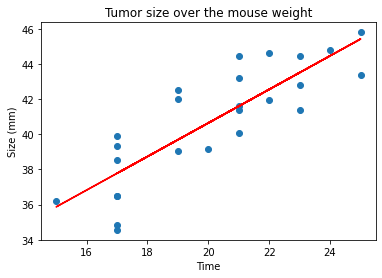

In [253]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(st.pearsonr(tmp['Weight (g)'], tmp['Tumor Volume (mm3)']))
(slope, intercept, rvalue, pvalue, stderr) = linregress(tmp['Weight (g)'], tmp['Tumor Volume (mm3)'])
regress_values = tmp['Weight (g)'] * slope + intercept
plt.title('Tumor size over the mouse weight')
plt.xlabel('Time')
plt.ylabel('Size (mm)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tmp['Weight (g)'], tmp['Tumor Volume (mm3)'])
plt.plot(tmp['Weight (g)'],regress_values,"r-")
print(line_eq)